<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Anthony Goyes  <br>
Fecha: 25/07/2022

# Importación de librerias necesarias

In [36]:
#Para esta actividad se importarán las siguientes librerías:
# Se importa pandas para trabajar con la colección de datos
import pandas as pd
# Se importa numpy para realizar operaciones númericas no nativas
import numpy as np
# Se usar la estadarización como método de imputación de datos
from sklearn.preprocessing import StandardScaler
# Se importa la librería para dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Se importa la librería para trabajar con el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
# Se importa la librería para realizar las métricas de rendimiento del modelo generado
from sklearn import metrics
# Se importa la librería para convertir de tipo date a numérico
import datetime as dt

## Cargar el Dataset

In [37]:
#Código para cargar el Dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Descripción de la fuente del Dataset

In [38]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Descripción**
La colección de datos propuesta fue extraída de https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset y hace referencia a "Conjunto de datos de bicicletas compartidas Conjunto de datos" donde se planea conocer el recuento del total de bicicletas de alquiler, incluidas las ocasionales y las registradas
**Variables de entrada**
- instant: (continua) índice de registros
- dteday : fecha
- season : (continua) estación (1:invierno, 2:primavera, 3:verano, 4:otoño)
- yr : (continua) año (0: 2011, 1:2012)
- mnth : (continua) mes ( 1 a 12)
- hr : (continua) hora (0 a 23)
- holiday (categórica): si el día es festivo o no (extraído de [Web Link])
- weekday (continua): día de la semana
- workingday (categórica): si el día no es ni fin de semana ni festivo es 1, en caso contrario es 0.
+ weathersit (categorica):
- 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
- 2: Niebla + Nublado, Niebla + Nubes dispersas, Niebla + Pocas nubes, Niebla
- 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
- 4: Lluvia intensa + Paletas de hielo + Tormenta eléctrica + Nieve, Nieve + Niebla
- temp (continua): Temperatura normalizada en Celsius. Los valores se obtienen mediante (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (sólo en escala horaria)
- atemp (continua): Temperatura de sensación normalizada en Celsius. Los valores se obtienen mediante (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (sólo en escala horaria)
- hum (continua): Humedad normalizada. Los valores se dividen entre 100 (máximo)
- windspeed (continua): Velocidad del viento normalizada. Los valores se dividen entre 67 (máx.)
- casual (continua): recuento de usuarios ocasionales
- registered (continua): recuento de usuarios registrados

**Variable Objetivo**
- cnt: **continua**-> recuento del total de bicicletas de alquiler, incluyendo las casuales y las registradas

## Explique el problema a resolver. 
Los sistemas de bicicletas compartidas son una nueva generación de alquileres de bicicletas tradicionales en los que todo el proceso, desde la afiliación, el alquiler y la devolución, se ha vuelto automático. A través de estos sistemas, el usuario puede alquilar fácilmente una bicicleta desde una posición particular y regresar en otra posición.

Aparte de las interesantes aplicaciones del mundo real de los sistemas de bicicletas compartidas, las características de los datos generados por estos sistemas los hacen atractivos para la investigación. A diferencia de otros servicios de transporte como el autobús o el metro, en estos sistemas se registra explícitamente la duración del viaje, la posición de salida y de llegada. Esta función convierte el sistema de bicicletas compartidas en una red de sensores virtual que se puede utilizar para detectar la movilidad en la ciudad. Por lo tanto, se utilizará el método de Regresión Lineal debido a que nuestra variable objetivo es continua para predicir la cantidad de bicicletas rentadas en relación a las variables de entrada.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [39]:
#Código que responde a la descripción 
# contar registros del dataset (instancias)
df.count()

instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

In [40]:
# Número de atributos de entrada, su significado y tipo
df.drop('cnt', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


- instant: (continua) índice de registros
- dteday : fecha
- season : (continua) estación (1:invierno, 2:primavera, 3:verano, 4:otoño)
- yr : (continua) año (0: 2011, 1:2012)
- mnth : (continua) mes ( 1 a 12)
- hr : (continua) hora (0 a 23)
- holiday (categórica): si el día es festivo o no (extraído de [Web Link])
- weekday (continua): día de la semana
- workingday (categórica): si el día no es ni fin de semana ni festivo es 1, en caso contrario es 0.
+ weathersit (categorica):
- 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
- 2: Niebla + Nublado, Niebla + Nubes dispersas, Niebla + Pocas nubes, Niebla
- 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
- 4: Lluvia intensa + Paletas de hielo + Tormenta eléctrica + Nieve, Nieve + Niebla
- temp (continua): Temperatura normalizada en Celsius. Los valores se obtienen mediante (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (sólo en escala horaria)
- atemp (continua): Temperatura de sensación normalizada en Celsius. Los valores se obtienen mediante (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (sólo en escala horaria)
- hum (continua): Humedad normalizada. Los valores se dividen entre 100 (máximo)
- windspeed (continua): Velocidad del viento normalizada. Los valores se dividen entre 67 (máx.)
- casual (continua): recuento de usuarios ocasionales
- registered (continua): recuento de usuarios registrados

<AxesSubplot:>

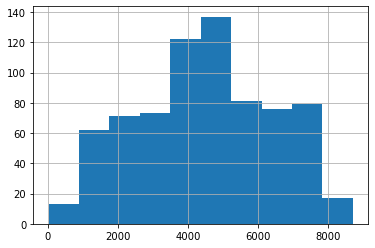

In [41]:
# Características de la variable objetivo
df['cnt'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [42]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
# Variable objetivo y variables de entrada
VariableObjetivo=['cnt']
VariablesEntrada=['instant','season','yr','mnth','holiday','weekday',
                  'workingday','weathersit','temp','atemp','hum',
                  'windspeed','casual','registered']

In [43]:
# Asignación de variables para más adelante (x y y)
X=df[VariableObjetivo].values
y=df[VariablesEntrada].values

In [44]:
### Estandarización de la data ###
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [45]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [46]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [47]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 1)
(511, 14)
(220, 1)
(220, 14)


## Modelamiento

In [49]:
#Código del modelo
RegModel = LinearRegression()

In [50]:
#Se genera el entrenamiento del modelo
LREG=RegModel.fit(X_train,y_train)

In [51]:
#Se realiza el apartado de prueba del modelo
prediction=LREG.predict(X_test)

## Evaluación del Modelo

El modelo generado tiene un 22% de Accurancy por lo que se concluye que el modelo predictivo generado es muy deficiente para predecir la cantidad de bicicletas rentadas según las variables de entrada propuestas. La razón a esto puede deberser a que existen características que no son necesarias para el modelo y que solo entorpecen la predicción. Además, se recalca la posibilida de que eliminar la columna de tipo fecha el modelo se haya visto afectado.

In [52]:
# Medición de ajuste en datos de entrenamiento
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

R2 Value: 0.22933033746441586
